### Popularity of Netflix Movies 
https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

Netflix is a streaming service that provides a wide variety of TV shows, movies, anime, documentaries and more on thousands of internet-connected devices. All movies are rated (scores, votes, popularity) using IMDb (Internet Movie Database)  and TMDB (The Movie Database).

The question we are trying to answer is: How much does the IMDb score, IMDb votes and TMDB score influence the TMDB popularity of a movie? How much does the runtime of a movie influence popularity? Which of these influence the tmdb popularity more?

For the answer, we are using a dataset that contains a list of movies and TV-shows available on Netflix streaming and was acquired in July 2022 containing data available in the United States. We have filtered the data to only consider movies released from 2020-2022. The dataset includes the variables (id (the title ID on JustWatch), title (the name of the title), show_type (TV show or movie), description (a short description), release_year (year it was released), age_certification (the age certification), runtime (the length of the episode (SHOW) or movie), genres (list of genres), production_countries (countries producin the title), seasons (Number of seasons if it's a SHOW), imdb_id (the title ID on IMDb), imdb_score (score on IMDb), imdb_votes (votes on IMDb), tmdb_popularity (popularity on TMDb), tmdb_score (score on TMDb).


In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [9]:
# I'm just providing a few ways of organizing the data...


titles_data <- read_csv("data/titles.csv")

titles_movie_data <- titles_data %>%
    filter(release_year > 2019, type == "MOVIE") %>% #, age_certification != "NA", imdb_id != "NA" ) %>%
    select(-description, -seasons, -type, -id, -release_year, -genres, -production_countries)

    
titles_movie_data
titles_split <- initial_split(titles_movie_data, prop = 0.75 , strata = tmdb_popularity)
titles_training <- training(titles_split)
titles_testing <- testing(titles_split)


Rows: 5850 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): id, title, type, description, age_certification, genres, production...
dbl (7): release_year, runtime, seasons, imdb_score, imdb_votes, tmdb_popula...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


title,age_certification,runtime,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
The Rental,R,88,tt10003008,5.7,30613,53.311,5.6
I'm Thinking of Ending Things,R,134,tt7939766,6.6,83093,17.610,6.6
Extraction,R,116,tt8936646,6.7,196105,51.910,7.4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
C/O Kaadhal,NA,134,tt11803618,7.7,348,NA,NA
Lokillo,NA,90,tt14585902,3.8,68,26.005,6.3
Dad Stop Embarrassing Me - The Afterparty,PG-13,37,NA,NA,NA,1.296,10.0


In [6]:

titles_mean <- titles_training %>%
    select(runtime, imdb_score, imdb_votes, tmdb_popularity, tmdb_score) %>%
    map_df(mean, na.rm = TRUE)
titles_mean

titles_max <- titles_training %>%
    select(runtime, imdb_score, imdb_votes, tmdb_popularity, tmdb_score) %>%
    map_df(max, na.rm = TRUE)

titles_min <- titles_training %>%
    select(runtime, imdb_score, imdb_votes, tmdb_popularity, tmdb_score) %>%
    map_df(min, na.rm = TRUE)

titles_range <- titles_max - titles_min
titles_range

runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
93.89534,6.010194,9191.823,42.16923,6.578814


runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
171,6.6,264189,2273.444,9


Warning message:
“Removed 18 rows containing missing values (geom_point).”
Warning message:
“Removed 120 rows containing missing values (geom_point).”


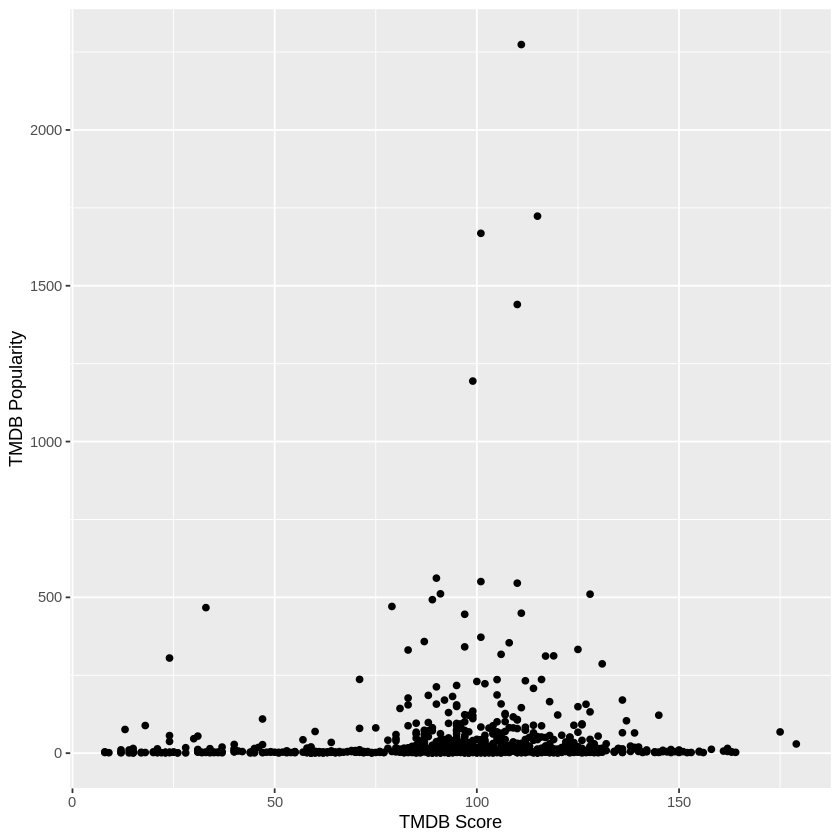

Warning message:
“Removed 125 rows containing missing values (geom_point).”


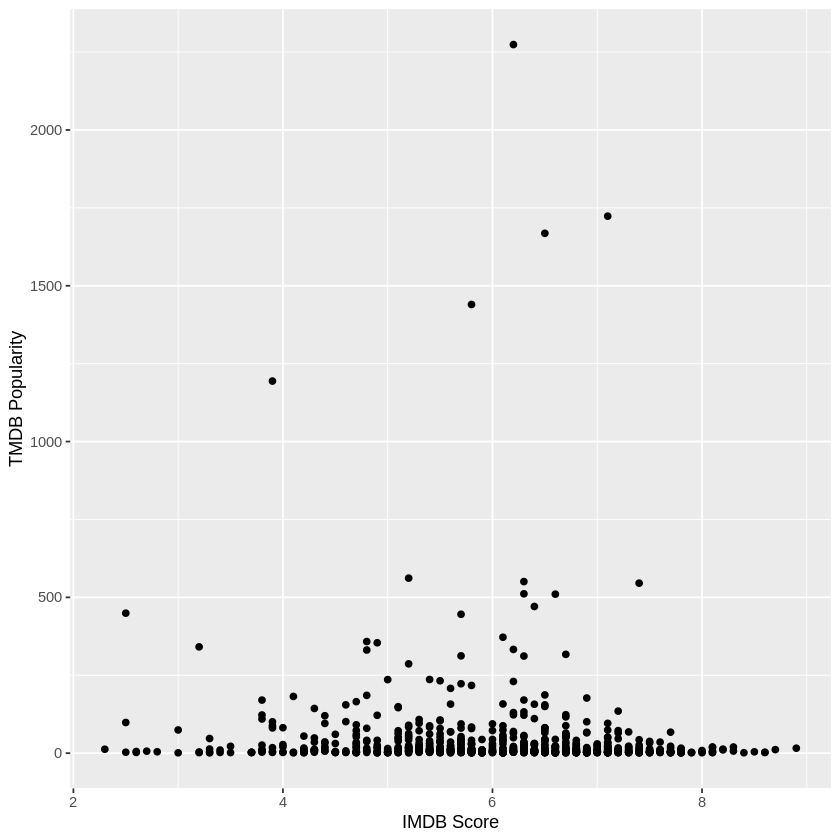

Warning message:
“Removed 61 rows containing missing values (geom_point).”


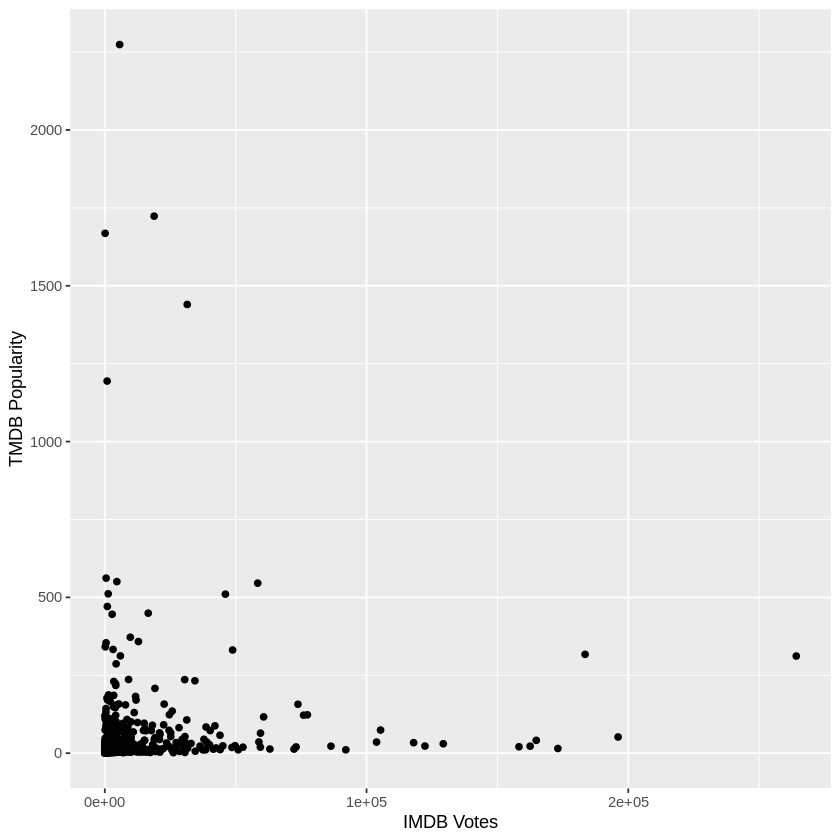

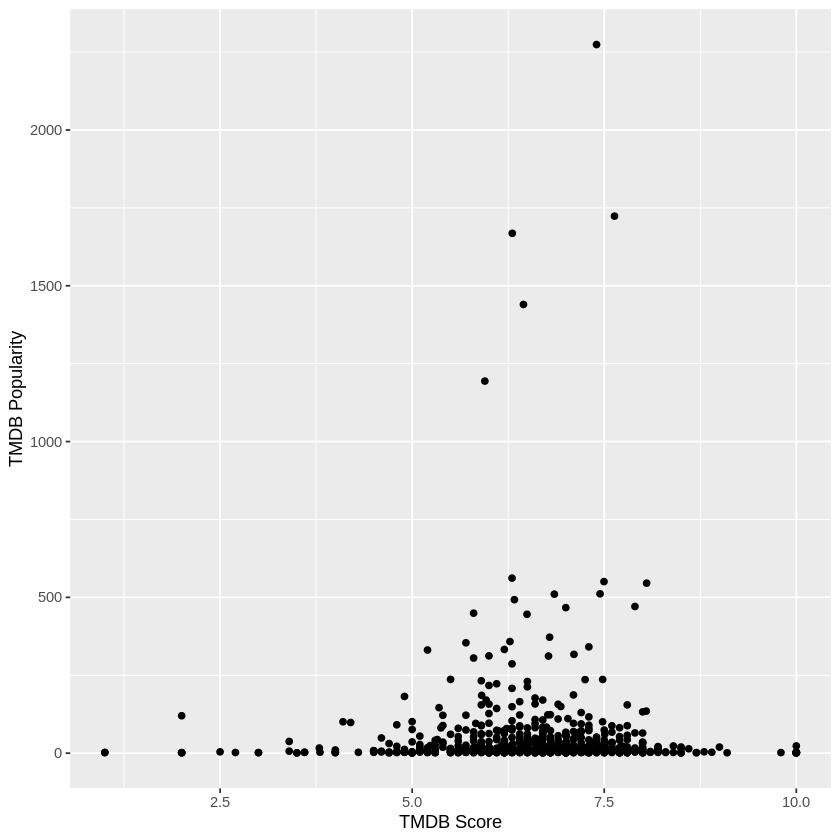

In [7]:
iscore_plot <- titles_training %>%
    ggplot(aes(x = imdb_score, y = tmdb_popularity)) +
    geom_point() +
    labs(x = "IMDB Score", y ="TMDB Popularity")

ivotes_plot <- titles_training %>%
    ggplot(aes(x = imdb_votes, y = tmdb_popularity)) +
    geom_point() +
    labs(x = "IMDB Votes", y ="TMDB Popularity")

tscore_plot <- titles_training %>%
    ggplot(aes(x = tmdb_score , y = tmdb_popularity)) +
    geom_point() +
    labs(x = "TMDB Score", y ="TMDB Popularity")

runtime_plot <- titles_training %>%
    ggplot(aes(x = runtime, y = tmdb_popularity)) +
    geom_point() +
    labs(x = "TMDB Score", y ="TMDB Popularity")

runtime_plot
iscore_plot
ivotes_plot
tscore_plot

### Methods we will be using:
We will be conducting our analysis using regression. We will use data from 4 columns, but create 2 regression visualizations to predict our popularity. First, we will use imdb_score, imdb_votes and tmdb_score as a combined independent variable (ratings) to predict the tmdb_popularity. Then we will use data from runtime to predict tmdb_popularity again. For both cases, we will be color-coding the visualization using data from age_certification to further analyze if there is any relationship between these. We will be using scatter-plots and a regression line to visualize our analysis. This way we can tie in the mathematical relationship of the data to explain the trend and predict the dependant variable (tmdb_popularity) with the independent variables (ratings and runtime).
Our expected outcome is to find if a higher overall rating (imdb scores, imdb votes, tmdb score) results in a higher popularity of the movie. We also aim to conclude if longer runtimes of movies influence people to have lower interest in the movies (reflected in popularity). Based on the findings, we can predict which factors will affect the popularity of a movie more distinctly. The impact this would have is it would help netflix know which movies will be the best to put onto their website. They would be able to know which movies will be most popular on their site based off of the ratings and runtime of movies that have had most consistency, maximizing the success of their website.

### Questions that our analysis could lead to are:
Does the genre / production countries of a movie have an effect on popularity? 
What groups of people have influences on the popularity? 
Does an overall popularity ranking truly reflect on the quality of a movie?


In [10]:
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection
